In [47]:
import cv2
import numpy as np
print(cv2.__version__)

3.4.0


### Reading and displaying images

[]

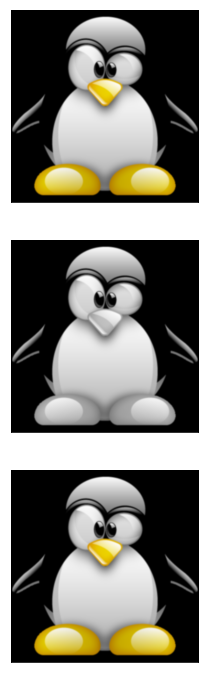

In [94]:
import matplotlib.pyplot as plt
img=cv2.imread('alpha.png')
gray=cv2.imread('alpha.png',cv2.IMREAD_GRAYSCALE)
alpha=cv2.imread('alpha.png',cv2.IMREAD_UNCHANGED)

# cv2.imshow('color_pic',img)
# cv2.imshow('gray_pic',gray)
# cv2.imshow('unchanged_pic',alpha)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# print('got here')


img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray=cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)
alpha=cv2.cvtColor(alpha,cv2.COLOR_BGR2RGB)
fig=plt.figure()
fig.add_subplot(3,1,1)
plt.xticks([])
plt.yticks([])
plt.imshow(img,interpolation='bicubic')
fig.add_subplot(3,1,2)
plt.xticks([])
plt.yticks([])
plt.imshow(gray,cmap='gray',interpolation='bicubic')
fig.add_subplot(3,1,3)
plt.imshow(alpha,interpolation='bicubic')
fig.set_size_inches(np.array(fig.get_size_inches()) * 3)
plt.xticks([])
plt.yticks([])
plt.plot()

In [85]:
cv2.namedWindow('wins',cv2.WINDOW_NORMAL)
cv2.imshow('wins',alpha)
cv2.resizeWindow('wins',1000,1000)
k=cv2.waitKey(0) & 0xFF
cv2.destroyAllWindows()

### Write an image

In [86]:
cv2.imwrite('penguin_gray.png',gray)

True

### Working with videos

In [1]:
import numpy as np
import cv2

In [2]:
cap= cv2.VideoCapture('ariel.mpg')
while(True):
    ret,frame=cap.read()
    
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame',gray)
    if cv2.waitKey(1)& 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

cap.get(i) -> gets property , i- 0 to 18

cap.set(i,value) -> sets property, returns True upon success

In [23]:
cap = cv2.VideoCapture('ariel.mpg')
y=int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
x=int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print(x,y)
fourcc = cv2.VideoWriter_fourcc(*'X264')
out= cv2.VideoWriter('output.avi',fourcc,20.0,(x,y))

while(cap.isOpened()):
    ret,frame= cap.read()
    if ret==True:
        frame= cv2.flip(frame,0)
        out.write(frame)
        
        cv2.imshow('frame',frame)
        if cv2.waitKey(1)&0xFF == ord('q'):
            break
    else:
        break
cap.release()
out.release()
cv2.destroyAllWindows()

320 240











## Drawing functions in OpenCV

### Drawing line

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
img = np.zeros((512,512,3), np.uint8)
img = cv2.line(img,(0,0),(511,511),(255,0,0),5)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()
cv2.imshow('blue_line',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Drawing rectangle

In [28]:
img = cv2.rectangle(img,(10,10),(500,500),(0,0,255),5)
cv2.imshow('rectangle',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Drawing Circle 

In [3]:
img = np.zeros((512,512,3),np.uint8)
img = cv2.circle(img,(256,256),50,(255,0,0),-1)
img = cv2.circle(img,(256,256),100,(0,0,255),4)
cv2.imshow('circle',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Drawing Ellipse

In [ ]:
img = cv2.ellipse(img,(256,256),(80,120),0,-180,180,255,5)
cv2.imshow('ellipse',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Drawing Polygon

In [10]:
pts = np.array([[100,50],[200,300],[500,200],[500,100]],np.int32)
pts = pts.reshape(-1,1,2)
print(pts)
img=np.zeros((512,512,3),np.uint8)
img = cv2.polylines(img,[pts],False,(0,255,255),10)
cv2.imshow('polygon',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[[100  50]]

 [[200 300]]

 [[500 200]]

 [[500 100]]]


### Adding text

In [14]:
img=np.zeros((512,512,3),np.uint8)
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img,'OpenCV',(10,500),font,2,(255,255,0),2,cv2.LINE_AA)
cv2.imshow('text',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Mouse as a Paint-Brush

In [1]:
import numpy as np
import cv2

events = [i for i in dir(cv2) if 'EVENT' in i]
print(events)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


In [3]:
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img,(x,y),100,(255,0,0),-1)
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF ==ord('q'):
        break
cv2.destroyAllWindows()

### A more advanced demo

In [4]:
import cv2 
import numpy as np

drawing = False
mode = True
ix,iy= -1,-1

def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode==True:
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),4)
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode==True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)
img = np.zeros((512,512,3),np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k== ord('q'):
        break
cv2.destroyAllWindows()

## Trackbar as the Color Palette

In [ ]:
import cv2
import numpy as np

def nothing(x):
    pass

img = np.zeros((300,512,3),np.uint8)
cv2.namedWindow('image')

cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch,'image',0,1,nothing)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k== ord('q'):
        break
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')    
    b = cv2.getTrackbarPos('B','image')    
    s = cv2.getTrackbarPos(switch,'image') 
    if s==0:
        img[:]=0
    else:
        img[:]=[b,g,r]
cv2.destroyAllWindows()